In [11]:
#0.Tải các thư viện cần thiết
%pip install pandas numpy seaborn matplotlib sklearn optuna shap xgboost statsmodels scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import optuna
import shap
import xgboost
import statsmodels
import scipy
#Kiem tra phien ban thu vien 
print("Phiên bản thư viện:")
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("seaborn:", sns.__version__)
print("matplotlib:", plt.matplotlib.__version__)
print("sklearn:", sklearn.__version__)
print("optuna:", optuna.__version__)
print("shap:", shap.__version__)
print("xgboost:", xgboost.__version__)
print("statsmodels:", statsmodels.__version__)
print("scipy:", scipy.__version__)

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.
Phiên bản thư viện:
pandas: 2.2.3
numpy: 1.24.4
seaborn: 0.13.2
matplotlib: 3.5.0
sklearn: 1.6.1
optuna: 4.3.0
shap: 0.47.2
xgboost: 2.1.4
statsmodels: 0.14.4
scipy: 1.13.1


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [12]:
#1.Su dung dataset california housing
from sklearn.datasets import fetch_california_housing
# Tải dữ liệu
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["PRICE"] = housing.target
# Xem thông tin dữ liệu
print(df.head())  # Hiển thị 5 dòng đầu tiên
print(df.info())  # Kiểm tra kiểu dữ liệu
print(df.describe())  # Thống kê nhanh

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup   

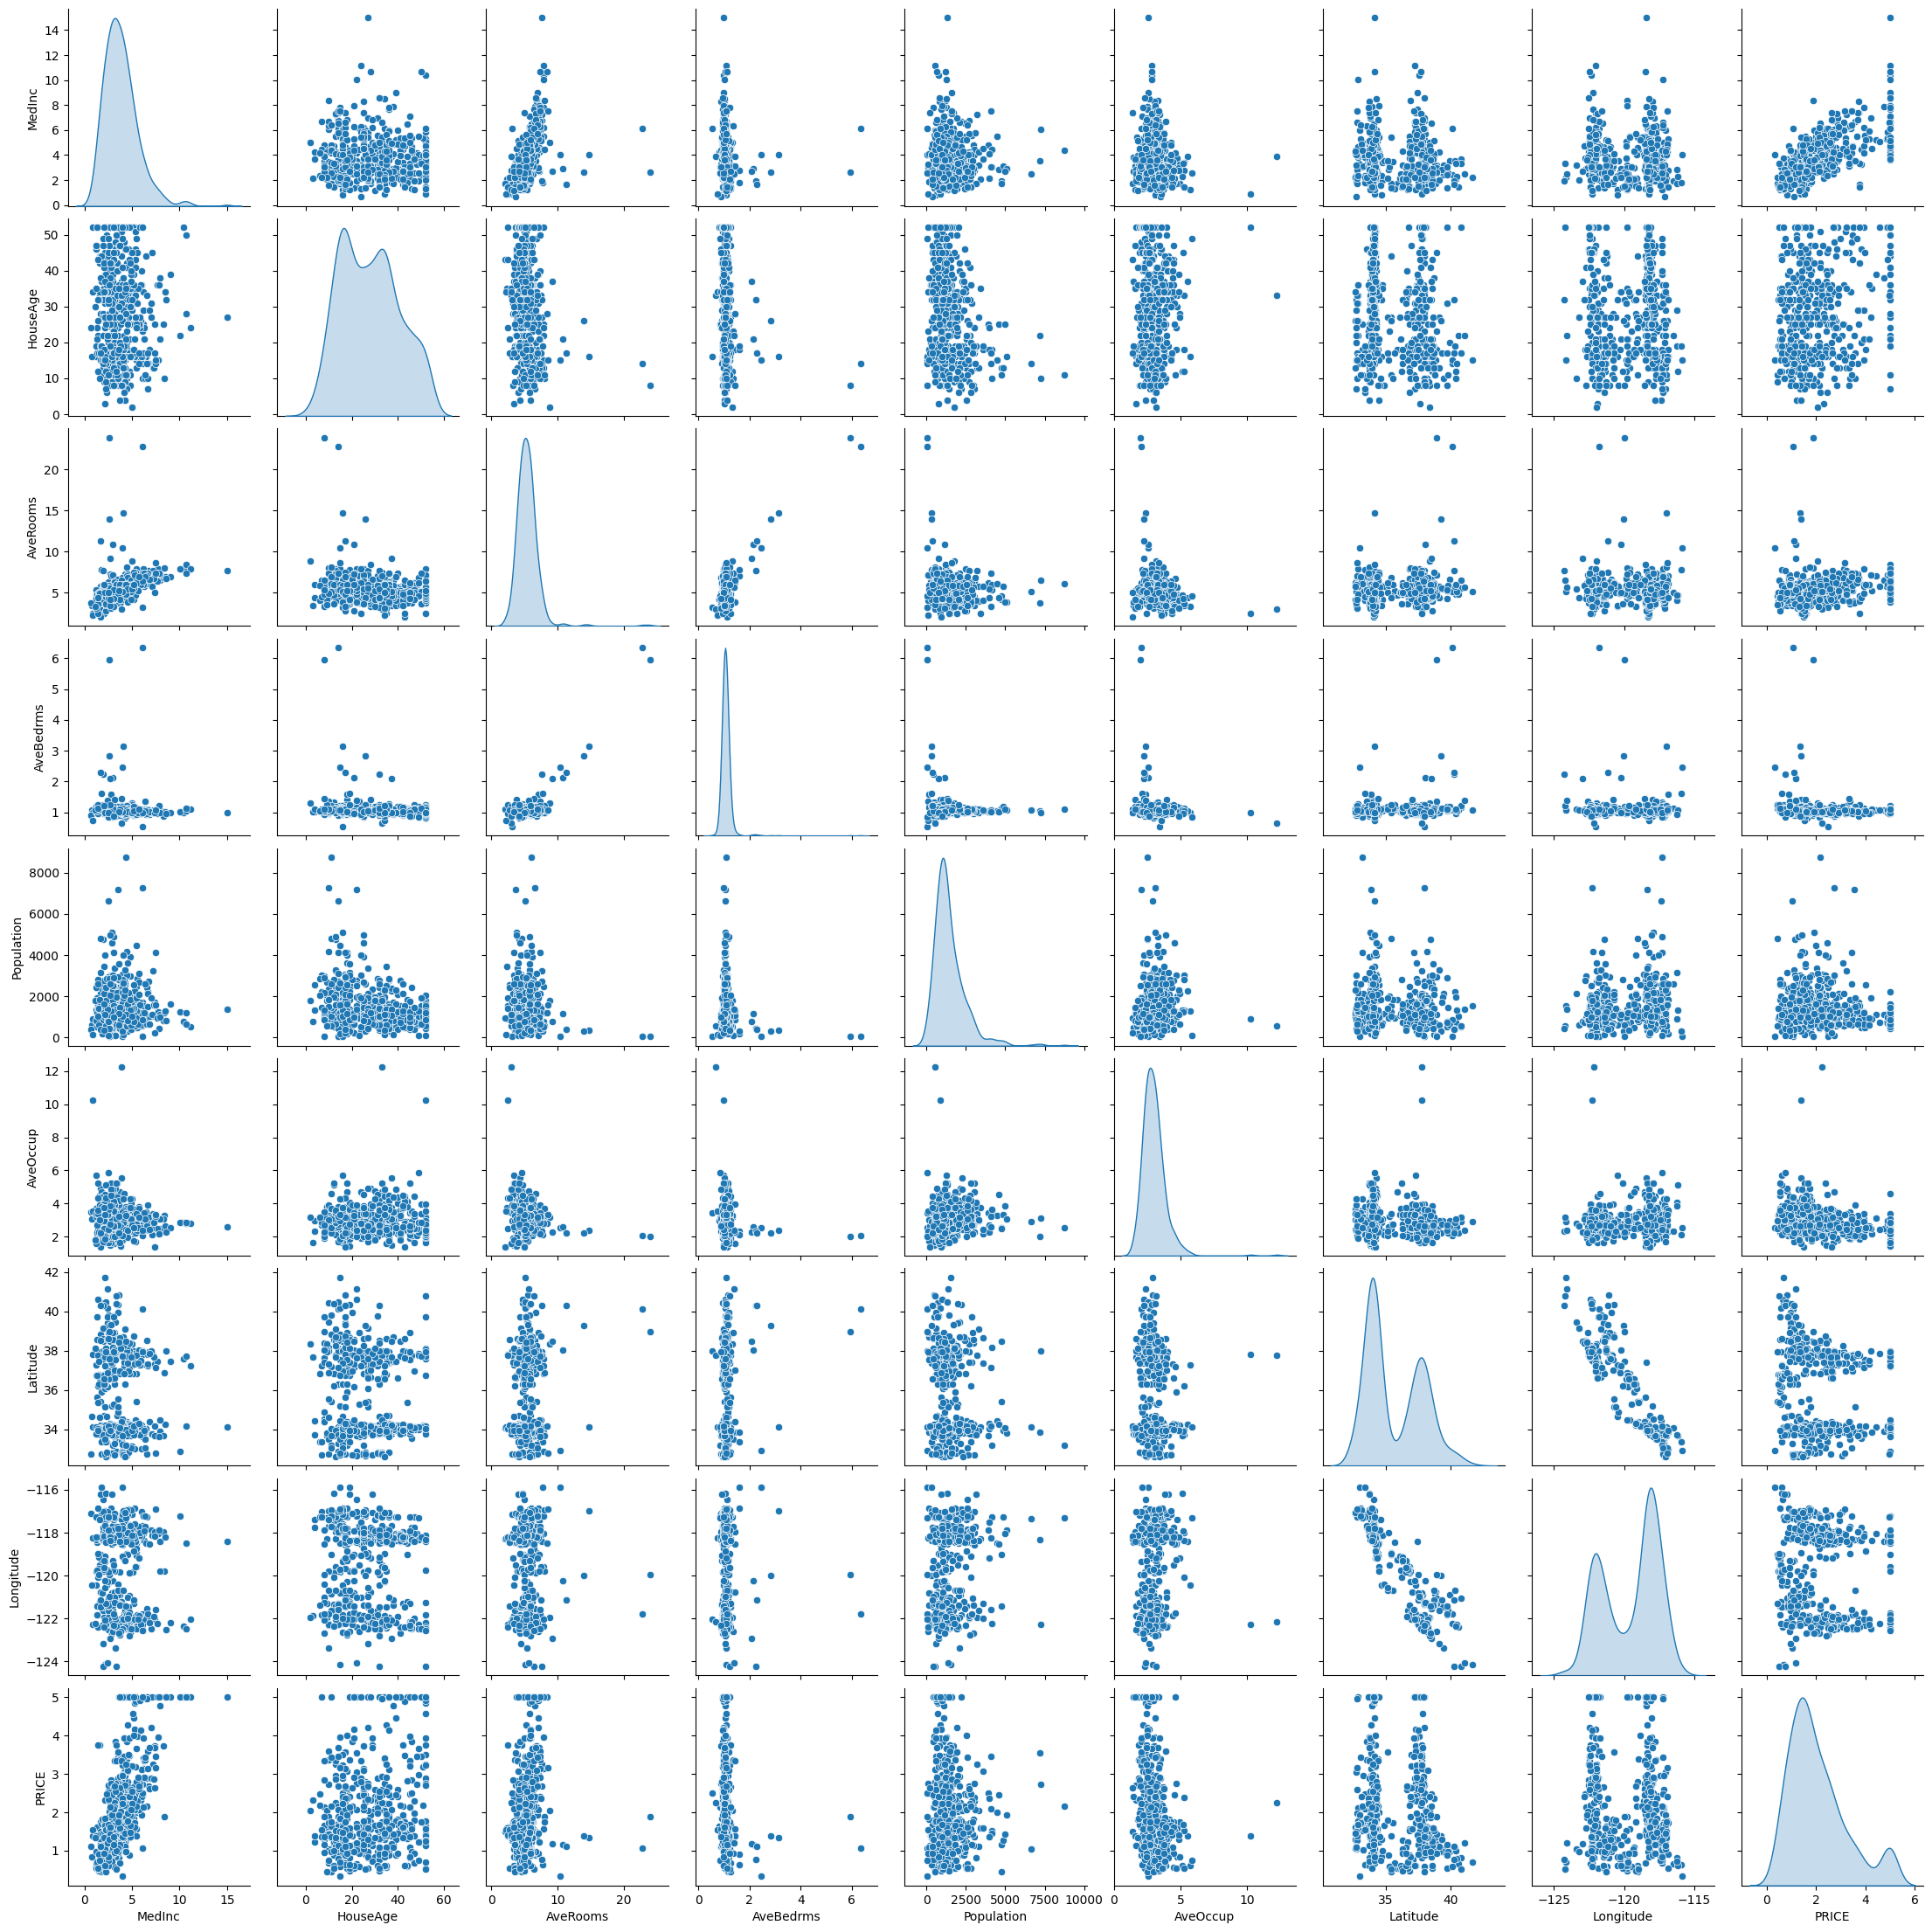

In [13]:
#2.Vẽ pairplot để kiểm tra mối quan hệ đặc trưng 
sns.pairplot(df.sample(500), diag_kind='kde')  # Lấy mẫu 500 để tăng tốc độ
plt.show()

In [14]:
#3.Kiểm tra tương quan tuyến tính với pearson
import pandas as pd
from scipy.stats import pearsonr
correlations = df.corr()["PRICE"].sort_values(ascending=False)
high_corr_features = [col for col in df.columns if abs(pearsonr(df[col], df["PRICE"])[0]) > 0.5]
print("Các đặc trưng có tương quan mạnh:", high_corr_features)

Các đặc trưng có tương quan mạnh: ['MedInc', 'PRICE']


In [15]:
#4.Xử lý ngoại lai-isolation forest 
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.datasets import fetch_california_housing
# Tải dữ liệu California Housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["PRICE"] = housing.target  # Thêm giá nhà vào DataFrame
# Áp dụng Isolation Forest để xác định ngoại lai
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df["outlier"] = iso_forest.fit_predict(df.drop(columns=["PRICE"]))
# Kiểm tra dữ liệu trước khi xóa cột
print(f"Trước xử lý: {df.shape[0]} dòng")
print(f"Số dòng có nhãn '1' (bình thường): {(df['outlier'] == 1).sum()}")
print(f"Số dòng có nhãn '-1' (ngoại lai): {(df['outlier'] == -1).sum()}")
# Lọc bỏ các ngoại lai
df = df[df["outlier"] == 1]
# Kiểm tra số lượng dòng sau khi lọc
print(f"Sau xử lý: {df.shape[0]} dòng")
# Xóa cột 'outlier' sau khi đã kiểm tra
df.drop(columns=["outlier"], inplace=True)
print("Đã xóa cột 'outlier', danh sách cột hiện tại:", df.columns)

Trước xử lý: 20640 dòng
Số dòng có nhãn '1' (bình thường): 19608
Số dòng có nhãn '-1' (ngoại lai): 1032
Sau xử lý: 19608 dòng
Đã xóa cột 'outlier', danh sách cột hiện tại: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')


In [16]:
#5.Kiểm tra và xử lý đa cộng tuyến
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.drop(columns=["PRICE"])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data[vif_data["VIF"] > 5])  # Loại bỏ đặc trưng có VIF > 5

     Feature          VIF
0     MedInc    15.907381
1   HouseAge     7.862762
2   AveRooms    56.504991
3  AveBedrms   155.586118
5   AveOccup    17.914681
6   Latitude   638.559018
7  Longitude  1018.759334


In [18]:
#5.Tạo đặc trưng mới
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
# Tạo các đặc trưng mới
df["room_per_pop"] = df["AveRooms"] / (df["Population"] + 1)
df["high_med_inc"] = (df["MedInc"] > df["MedInc"].mean()).astype(int)
df["AveRooms_HouseAge"] = df["AveRooms"] * df["HouseAge"]
# Tạo đặc trưng phi tuyến (Polynomial Features)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df.drop(columns=["PRICE"]))
# Chuyển đổi poly_features thành DataFrame với tên cột mới
poly_feature_names = poly.get_feature_names_out(df.drop(columns=["PRICE"]).columns)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)
# Hiển thị một phần kết quả để kiểm tra
print("Dữ liệu gốc:")
print(df.head())
print("\nDữ liệu sau khi tạo đặc trưng phi tuyến:")
print(df_poly.head())

Dữ liệu gốc:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  room_per_pop  high_med_inc  AveRooms_HouseAge  
0    -122.23  4.526      0.021623             1         286.349206  
1    -122.22  3.585      0.002597             1         131.000879  
2    -122.24  3.521      0.016676             1         430.983051  
3    -122.25  3.413      0.010407             1         302.502283  
4    -122.25  3.422      0.011099             1         326.656371  

Dữ liệu sau khi tạo đặc trưng phi tuyến:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  

In [20]:
#6.Huấn luyện mô hình
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(poly_features, df["PRICE"], test_size=0.2, random_state=42)
models = {
    "Linear Regression": LinearRegression(),
    "XGBoost": xgb.XGBRegressor(),
}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name}: R² = {r2_score(y_test, preds)}, RMSE = {np.sqrt(mean_squared_error(y_test, preds))}")

Linear Regression: R² = 0.7408731081457332, RMSE = 0.578773989770665
XGBoost: R² = 0.8341381029664957, RMSE = 0.46304806832603573


In [22]:
#7.Tối ưu hóa bằng Bayesian Optimization
from sklearn.model_selection import cross_val_score
def objective(trial):
    params = {
    "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.2),
    "n_estimators": trial.suggest_int("n_estimators", 100, 300), 
    "max_depth": trial.suggest_int("max_depth", 3, 8) 
}
    model = xgb.XGBRegressor(**params)
    score = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=3).mean()
    return score
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=5)
print("Thông số tối ưu:", study.best_params)

[I 2025-05-06 08:39:00,187] A new study created in memory with name: no-name-2e63af16-2f19-4f58-aa0f-406af56595a4
[I 2025-05-06 08:39:04,897] Trial 0 finished with value: -0.22112218045369916 and parameters: {'learning_rate': 0.1360596937126833, 'n_estimators': 106, 'max_depth': 7}. Best is trial 0 with value: -0.22112218045369916.
[I 2025-05-06 08:39:06,315] Trial 1 finished with value: -0.24861581538659885 and parameters: {'learning_rate': 0.06987728179057469, 'n_estimators': 235, 'max_depth': 3}. Best is trial 1 with value: -0.24861581538659885.
[I 2025-05-06 08:39:09,748] Trial 2 finished with value: -0.21396660509190044 and parameters: {'learning_rate': 0.1448951848515509, 'n_estimators': 219, 'max_depth': 5}. Best is trial 1 with value: -0.24861581538659885.
[I 2025-05-06 08:39:11,242] Trial 3 finished with value: -0.23381885732288765 and parameters: {'learning_rate': 0.09651998833145893, 'n_estimators': 146, 'max_depth': 4}. Best is trial 1 with value: -0.24861581538659885.
[I 2

Thông số tối ưu: {'learning_rate': 0.06987728179057469, 'n_estimators': 235, 'max_depth': 3}


In [23]:
#8.Kết hợp mô hình bằng Stacking
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
stacking_model = StackingRegressor(
    estimators=[
        ('xgb', xgb.XGBRegressor(**study.best_params)),
        ('lr', LinearRegression())
    ],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.06987728179057469,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=235, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('lr', LinearRegression())],
                  final_estimator=LinearRegression())

Stacking Model - MAPE: 0.1909604327237844


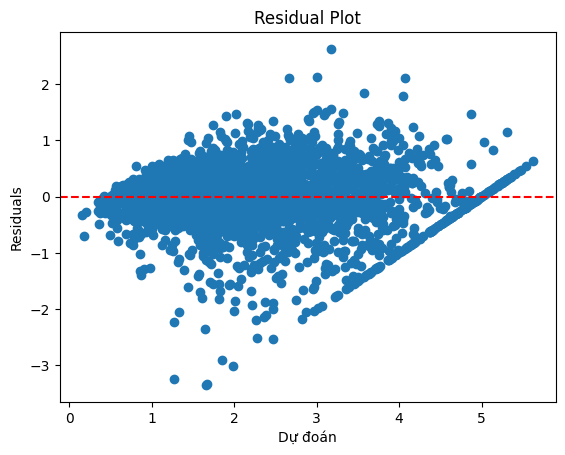

In [24]:
#9.Đánh giá mô hình
from sklearn.metrics import mean_absolute_percentage_error
final_preds = stacking_model.predict(X_test)
print(f"Stacking Model - MAPE: {mean_absolute_percentage_error(y_test, final_preds)}")
plt.scatter(final_preds, final_preds - y_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Dự đoán")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

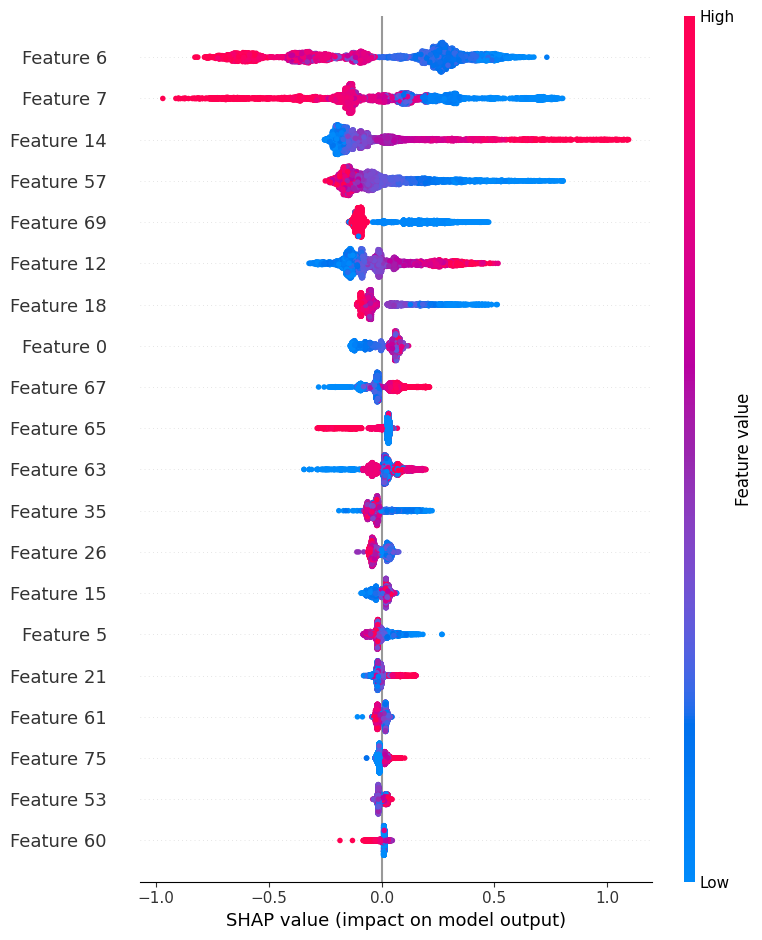

In [25]:
#10.Phân tích SHAP
explainer = shap.Explainer(stacking_model.named_estimators_['xgb'])
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)